### Problem Statement
The problem that we are going to solve here is that given a set of features that describe whether a person is suffering from heart disease or not, our machine learning model must predicts whether the person is suffering from heart disease or not.

### We will analyse the problem by using the 3 algorithms:
1. Logistic Regression
2. K Neighbors Classifier
3. Gausian Naive Bayes

### Data Collection
To train our machine learning model with heart disease prediction data, we will be using prediction of heart diseases dataset https://www.kaggle.com/johnsmith88/heart-disease-dataset

### DATASET EXPLANATION
1.Age (In years)

2.Sex 1 - Male 0 - Female

3.CP (Chest Pain Type) 0 - Typical Angina (Heart related) 1 - Atypical Angina (Non-heart related) 2 - Non-Anginal pain (Non-heart related) 3 - Asymptomatic (No disease)

4.TRESTBPS (Resting Blood Pressure (in mm Hg on admission to the hospital))

5.CHOL (Serum Cholestoral in mg/dl) Healthy serum cholesterol is less than 200 mg/dL

6.FPS (Fasting blood sugar > 120 mg/dl) 1 - True 0 - False

7.RESTECH (Resting Electro Cardio Graphic results)

8.THALACH (Maximum heart rate achieved)

9.EXANG (Exercise induced Angina) 1 - Yes 0 - No

10.OLDPEAK (ST depression induced by exercise relative to rest)

11.SLOPE (Slope of the peak exercise ST segment) 12.CA (Number of major vessels (0-3) colored by Flouroscopy)

13.THAL 0 - Normal 1 - Fixed defect 2 - Reversible defect

14.TARGET 1 - Heart Problem 0 - No Heart Problem

### Description about the Data
This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.

## Importing Libraries

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plts

## Read the data

In [2]:
data = pd.read_csv("HeartDisease.csv")
data.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0

In [3]:
data.describe()

age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000     0.000000    71.000000     0.000000     0.000000   
25%       0.000000     0.000000   132.000000     0.000000     0.000000   
50%       0.000000     1.000000   152.000000     0.000000     0.800000   
75%       0.000000     1.000000   166.000000     1.000000     1.800000   
max       1.000000     2.000000   202.000000     1.000000     6.200000   

             slope           ca         thal       target  
count  1025.000000  1025.000000  1025.000000  1025.000000  
mean      1.385366     0.754146     2.323902     0.513171  
std       0.617755     1.030798     0.620660     0.500070  
min       0.000000     0.000000     0.000000     0.000000  
25%       1.000000     0.000000     2.000000     0.000000  
50%       1.000000     0.000000     2.000000     1.000000  
75%       2.000000     1.000000     3.000000     1.000000  
max       2.000000     4.000000     3.000000     1.000000

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
data.shape

(1025, 14)

## Exploratory Data Analysis

## Statistical Analysis

In [6]:
# checking the data type of any column
data.age.dtype

dtype('int64')

In [7]:
type(data.age[0])

numpy.int64

In [8]:
data.columns.value_counts()

cp          1
sex         1
oldpeak     1
thalach     1
slope       1
restecg     1
fbs         1
age         1
ca          1
chol        1
exang       1
target      1
thal        1
trestbps    1
dtype: int64

In [9]:
#checking the occurances or frequency of values in a particular column
data['age'].value_counts() #mode

58    68
57    57
54    53
59    46
52    43
51    39
56    39
62    37
60    37
44    36
64    34
63    32
41    32
67    31
61    31
55    30
65    27
43    26
53    26
42    26
66    25
45    25
48    23
46    23
50    21
47    18
49    17
35    15
70    14
39    14
38    12
68    12
40    11
71    11
69     9
34     6
37     6
29     4
76     3
74     3
77     3
Name: age, dtype: int64

In [10]:
#checking for duplicated values
data[data.duplicated()]

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
15     34    0   1       118   210    0        1      192      0      0.7   
31     50    0   1       120   244    0        1      162      0      1.1   
43     46    1   0       120   249    0        0      144      0      0.8   
55     55    1   0       140   217    0        1      111      1      5.6   
61     66    0   2       146   278    0        0      152      0      0.0   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
15        2   0     2       1  
31        2   0     2       1  
43        2   0     3       0  
55        0   0     3       0  
61        1   1     2       1  
...     ...  ..   ...     ...  
1020      2   0     2       1  
1021      1   1     3       0  
1022      1   1     2       0  
1023      2   0     2       1  
1024      1   1     3       0  

[723 rows x 14 columns]

In [11]:
#checking for duplicated values in a particular column
data[data['age'].duplicated()]

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
6      58    1   0       114   318    0        2      140      0      4.4   
14     52    1   0       128   204    1        1      156      1      1.0   
15     34    0   1       118   210    0        1      192      0      0.7   
16     51    0   2       140   308    0        0      142      0      1.5   
17     54    1   0       124   266    0        0      109      1      2.2   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
6         0   3     1       0  
14        1   0     0       0  
15        2   0     2       1  
16        2   1     2       1  
17        1   1     3       0  
...     ...  ..   ...     ...  
1020      2   0     2       1  
1021      1   1     3       0  
1022      1   1     2       0  
1023      2   0     2       1  
1024      1   1     3       0  

[984 rows x 14 columns]

In [12]:
data.describe()

age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000     0.000000    71.000000     0.000000     0.000000   
25%       0.000000     0.000000   132.000000     0.000000     0.000000   
50%       0.000000     1.000000   152.000000     0.000000     0.800000   
75%       0.000000     1.000000   166.000000     1.000000     1.800000   
max       1.000000     2.000000   202.000000     1.000000     6.200000   

             slope           ca         thal       target  
count  1025.000000  1025.000000  1025.000000  1025.000000  
mean      1.385366     0.754146     2.323902     0.513171  
std       0.617755     1.030798     0.620660     0.500070  
min       0.000000     0.000000     0.000000     0.000000  
25%       1.000000     0.000000     2.000000     0.000000  
50%       1.000000     0.000000     2.000000     1.000000  
75%       2.000000     1.000000     3.000000     1.000000  
max       2.000000     4.000000     3.000000     1.000000

In [13]:
data.mean()

age          54.434146
sex           0.695610
cp            0.942439
trestbps    131.611707
chol        246.000000
fbs           0.149268
restecg       0.529756
thalach     149.114146
exang         0.336585
oldpeak       1.071512
slope         1.385366
ca            0.754146
thal          2.323902
target        0.513171
dtype: float64

In [14]:
data.mode()

age  sex   cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0  58.0  1.0  0.0     120.0   204  0.0      1.0    162.0    0.0      0.0   
1   NaN  NaN  NaN       NaN   234  NaN      NaN      NaN    NaN      NaN   

   slope   ca  thal  target  
0    1.0  0.0   2.0     1.0  
1    NaN  NaN   NaN     NaN

In [15]:
# calculating mode for a particular column
data.age.mode()

0    58
dtype: int64

In [16]:
#getting unique entries in each column
data.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [17]:
#distribution of the range of ages for heart attack i.e renaming columns for convinience
data.columns=['age','sex','cp','trestbp','chol','fbs','restEcg','MaxHRC','exAng','oldPeak','slope','MajorVessels','thala','target']

In [18]:
data.head()

age  sex  cp  trestbp  chol  fbs  restEcg  MaxHRC  exAng  oldPeak  slope  \
0   52    1   0      125   212    0        1     168      0      1.0      2   
1   53    1   0      140   203    1        0     155      1      3.1      0   
2   70    1   0      145   174    0        1     125      1      2.6      0   
3   61    1   0      148   203    0        1     161      0      0.0      2   
4   62    0   0      138   294    1        1     106      0      1.9      1   

   MajorVessels  thala  target  
0             2      3       0  
1             0      3       0  
2             0      3       0  
3             1      3       0  
4             3      2       0

### Understanding the data by summarizing their main characteristics often plotting them visually
Now, we can use visualizations to better understand our data and then look at any processing we might want to do.

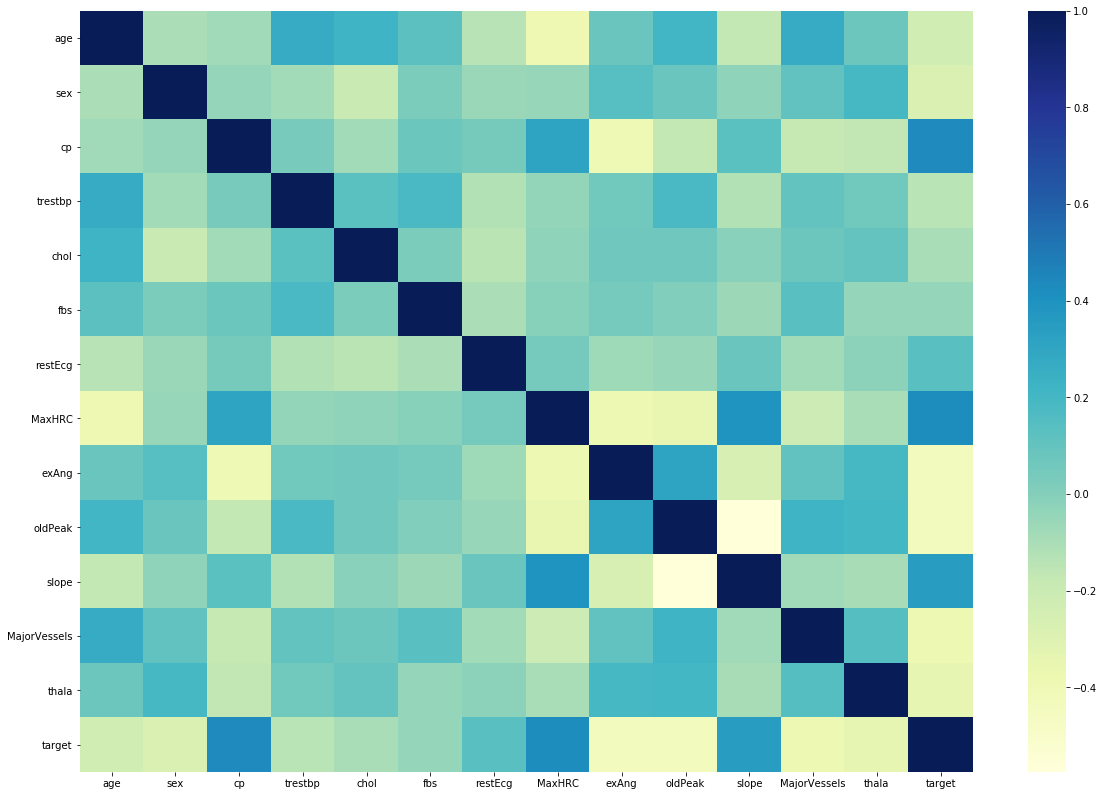

In [19]:
plt.figure(figsize=(20,14))
sns.heatmap(data.corr(),cmap='YlGnBu')

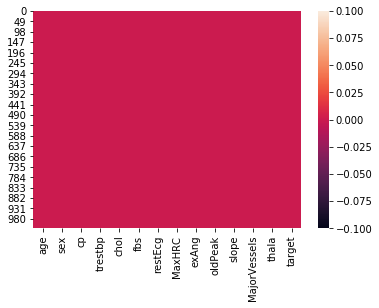

In [20]:
##visualizing the missing values with heatmap
sns.heatmap(data.isna())

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B4B59FCD88>,
      dtype=object)

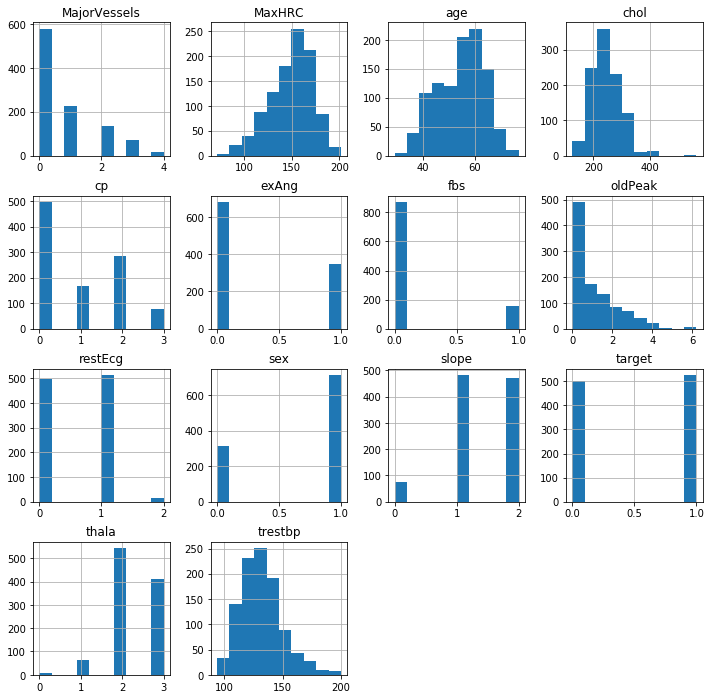

In [21]:
data.hist(figsize=(12,12))

the above histograms i can see each feature having different distributions. Thus, using scaling before our predictions should be of great use for normalizing data within range and speeding up of calculations in an algorithm.

Also, the categorical features do stand out.It's always a good practice to work with a dataset where the target classes are of approximately equal size. Thus, let's check for the same.

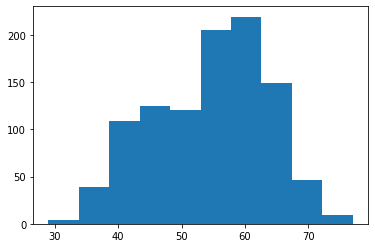

In [22]:
data['age'].hist(grid=False)

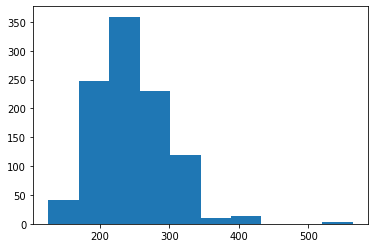

In [23]:
data['chol'].hist(grid=False)

1    526
0    499
Name: target, dtype: int64


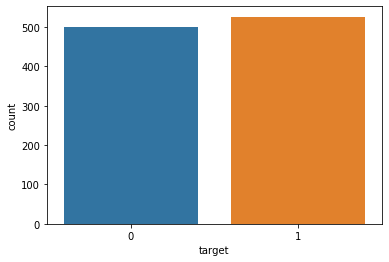

In [24]:
y = data["target"]
sns.countplot(y)
target_temp = data.target.value_counts()
print(target_temp)

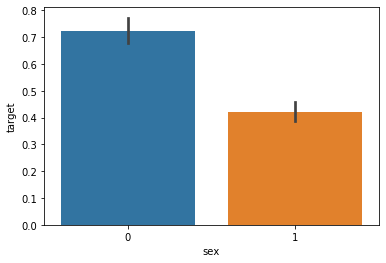

In [25]:
sns.barplot(data["sex"],data["target"])

## Heart disease frequency for ages

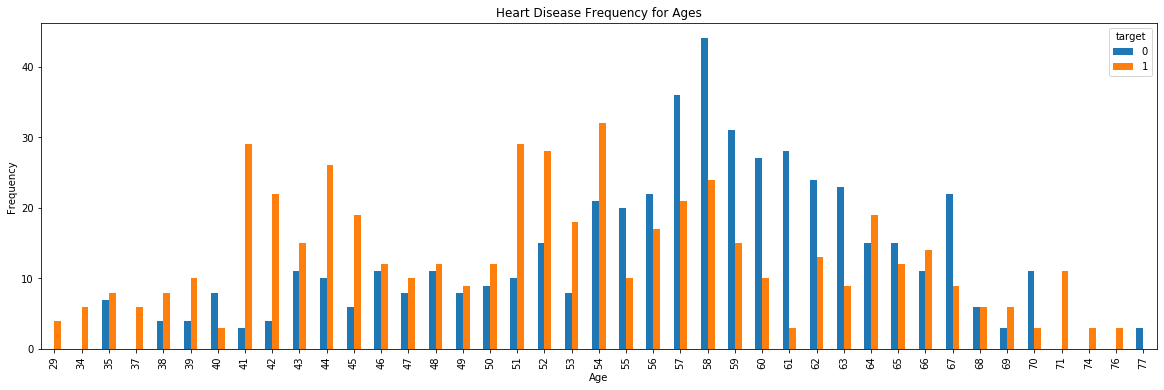

In [26]:
pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

## Heart Disease frequency for male and female

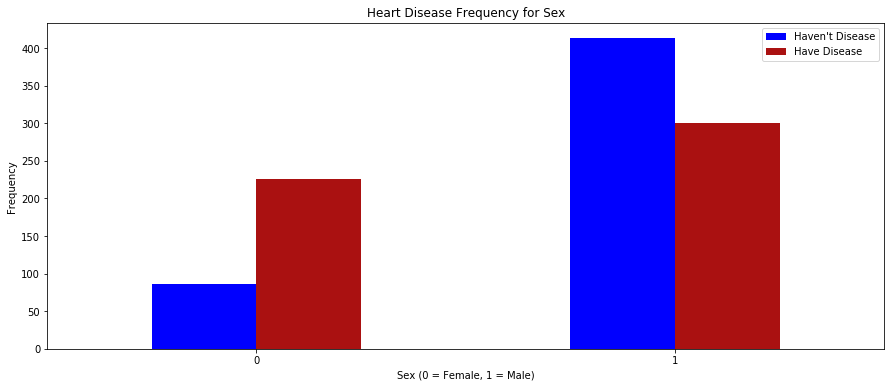

In [27]:
pd.crosstab(data.sex,data.target).plot(kind="bar",figsize=(15,6),color=['blue','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

## Thalassemia vs cholesterol

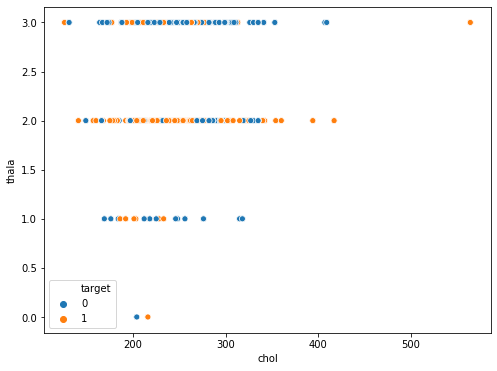

In [29]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='chol',y='thala',data=data,hue='target')
plt.show()

## Thalassemia vs resting blood pressure

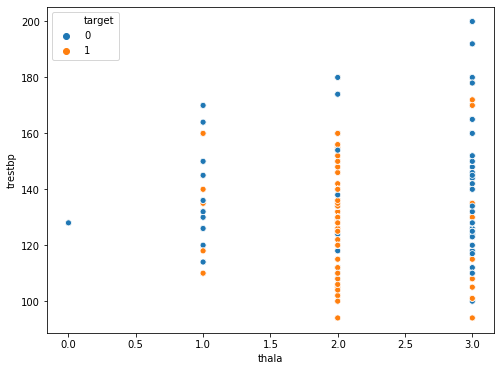

In [30]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='thala',y='trestbp',data=data,hue='target')
plt.show()

## Age vs Maximum heart disease rate

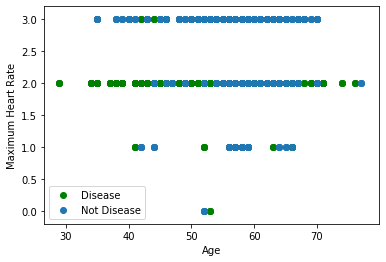

In [31]:
plt.scatter(x=data.age[data.target==1], y=data.thala[(data.target==1)], c="green")
plt.scatter(x=data.age[data.target==0], y=data.thala[(data.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

## Fasting Blood sugar Data

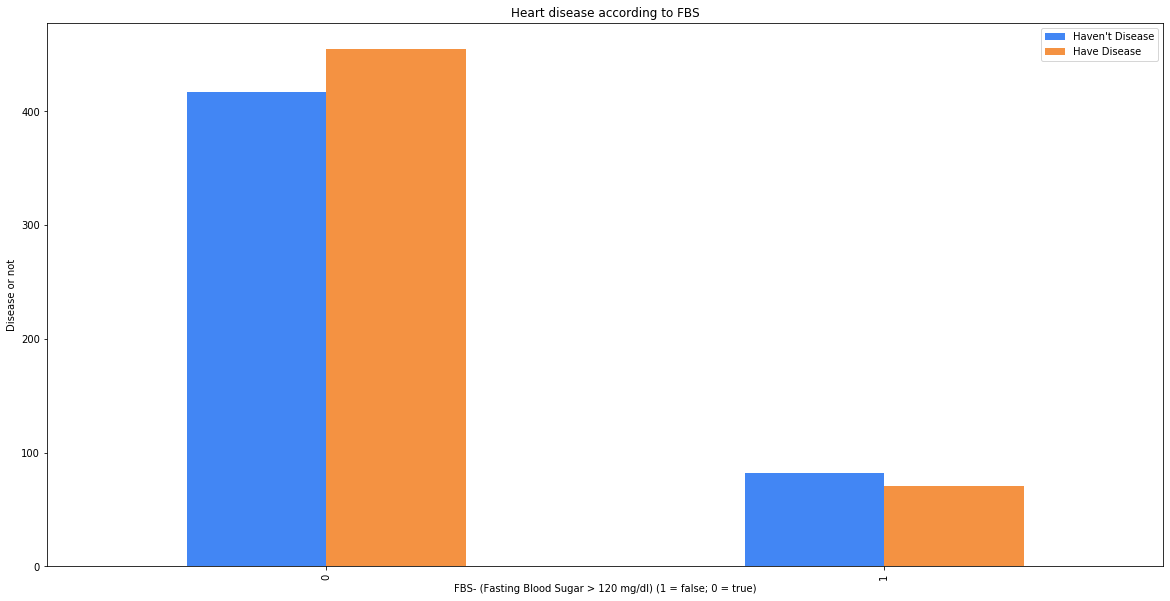

In [33]:
pd.crosstab(data.fbs,data.target).plot(kind="bar",figsize=(20,10),color=['#4286f4','#f49242'])
plt.title("Heart disease according to FBS")
plt.xlabel('FBS- (Fasting Blood Sugar > 120 mg/dl) (1 = false; 0 = true)')
plt.xticks(rotation=90)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Disease or not')
plt.show()

### Split the dataset into input and output--> Train and test
### Train--> Building the model
### Test--> How well the model has learnt(Generaize on unseen data)

In [35]:
# Preparing Input and Output
# Drop the id and diagnosis columns
X = data.drop(['target'], axis=1)
X.head()

age  sex  cp  trestbp  chol  fbs  restEcg  MaxHRC  exAng  oldPeak  slope  \
0   52    1   0      125   212    0        1     168      0      1.0      2   
1   53    1   0      140   203    1        0     155      1      3.1      0   
2   70    1   0      145   174    0        1     125      1      2.6      0   
3   61    1   0      148   203    0        1     161      0      0.0      2   
4   62    0   0      138   294    1        1     106      0      1.9      1   

   MajorVessels  thala  
0             2      3  
1             0      3  
2             0      3  
3             1      3  
4             3      2

In [36]:
# Accessing Output Column
y = data.target
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [37]:
# Preparing Training and Testing Data
# Storing 70% of the data(569 rows) into training and remaining 30% of the data into testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, 
                                                    random_state=10)

In [38]:
print(X_train.shape)

(717, 13)


In [39]:
print(X_test.shape)

(308, 13)


In [40]:
print(y_train.shape)

(717,)


In [41]:
print(y_test.shape)

(308,)


In [42]:
X_train

age  sex  cp  trestbp  chol  fbs  restEcg  MaxHRC  exAng  oldPeak  slope  \
750   55    1   1      130   262    0        1     155      0      0.0      2   
807   44    1   2      130   233    0        1     179      1      0.4      2   
687   58    1   0      125   300    0        0     171      0      0.0      2   
651   41    1   1      120   157    0        1     182      0      0.0      2   
826   42    1   2      130   180    0        1     150      0      0.0      2   
..   ...  ...  ..      ...   ...  ...      ...     ...    ...      ...    ...   
156   40    1   3      140   199    0        1     178      1      1.4      2   
123   65    0   2      140   417    1        0     157      0      0.8      2   
369   51    1   2      110   175    0        1     123      0      0.6      2   
320   53    0   0      130   264    0        0     143      0      0.4      1   
527   62    0   0      124   209    0        1     163      0      0.0      2   

     MajorVessels  thala  
750             0      2  
807             0      2  
687             2      3  
651             0      2  
826             0      2  
..            ...    ...  
156             0      3  
123             1      2  
369             0      2  
320             0      2  
527             0      2  

[717 rows x 13 columns]

## Logistic Regression

In [43]:
# Build the classifier on training data
# Sklearn library: import, instantiate, fit
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()  # Creating object for Logistic Regression class
reg.fit(X_train, y_train) # Input and Output will be passed to the fit method

C:\Users\Likhita\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
# Predicting on train data  
# Syntax: objectName.predict(Input)
y_train_pred = reg.predict(X_train)
y_train_pred

array([1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,

In [45]:
y_train== y_train_pred # Comparing actual values and predicted values

750    True
807    True
687    True
651    True
826    True
       ... 
156    True
123    True
369    True
320    True
527    True
Name: target, Length: 717, dtype: bool

In [46]:
# Confusion matrix for training data
# Confusion matrix(Actual Values, Predicted values)
from sklearn.metrics import confusion_matrix, accuracy_score
conf = confusion_matrix(y_train, y_train_pred)
conf

array([[279,  67],
       [ 30, 341]], dtype=int64)

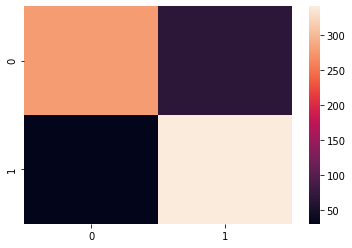

In [47]:
sns.heatmap(conf)

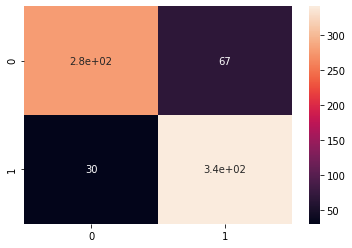

In [48]:
sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True)

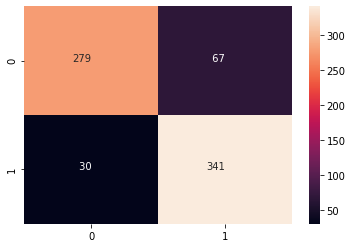

In [49]:
# supported values for ha are : 'center', 'right', 'left'
# supported values for va are : 'top', 'bottom', 'center', 'baseline', 'center_baseline
# fmt can also be given as d(integer formatting)
sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True, fmt='3.0f', annot_kws={'size':'10', "ha": 'right',"va": 'baseline'})

In [50]:
conf

array([[279,  67],
       [ 30, 341]], dtype=int64)

In [51]:
print('true_negative=', conf[0][0])
print('false_positive=', conf[0][1])
print('false_negative=', conf[1][0])
print('true_positive=',  conf[1][1])

true_negative= 279
false_positive= 67
false_negative= 30
true_positive= 341


In [52]:
## Accuracy--> TP+TN/TP+FP+TN+FN
## Correct Predictions/ Total Number of Predictions
(266+347)/(347+69+35+266)

0.8549511854951185

In [53]:
# Calculating Accuracy: Syntax:- ccuracy_score(actualValues, predictedValues)
from sklearn.metrics import accuracy_score
accuracy_score(y_train, y_train_pred)

0.8647140864714087

In [54]:
#prediction on Test data
# Syntax: objectName.predict(Input)
y_test_pred = reg.predict(X_test)
y_test_pred

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,

In [55]:
y_test== y_test_pred # Comparing actual values and predicted values

620     True
181     True
546     True
618     True
822     True
       ...  
964     True
242     True
757    False
157     True
999     True
Name: target, Length: 308, dtype: bool

In [56]:
# Confusion matrix for testing data
# Confusion matrix(Actual Values, Predicted values)
from sklearn.metrics import confusion_matrix, accuracy_score
conf = confusion_matrix(y_test, y_test_pred)
conf

array([[126,  27],
       [ 14, 141]], dtype=int64)

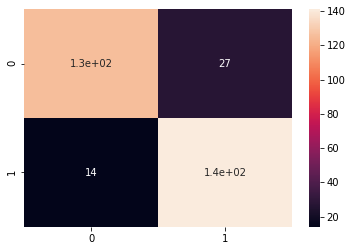

In [57]:
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True)

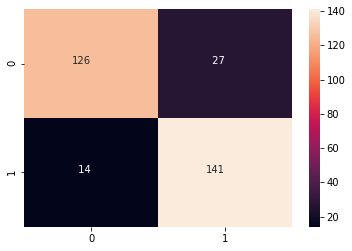

In [58]:
# supported values for ha are : 'center', 'right', 'left'
# supported values for va are : 'top', 'bottom', 'center', 'baseline', 'center_baseline
# fmt can also be given as d(integer formatting)
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='3.0f', annot_kws={'size':'10', "ha": 'right',"va": 'baseline'})

In [59]:
conf

array([[126,  27],
       [ 14, 141]], dtype=int64)

In [60]:
print('true_negative=', conf[0][0])
print('false_positive=', conf[0][1])
print('false_negative=', conf[1][0])
print('true_positive=',  conf[1][1])

true_negative= 126
false_positive= 27
false_negative= 14
true_positive= 141


In [61]:
## Accuracy--> TP+TN/TP+FP+TN+FN
## Correct Predictions/ Total Number of Predictions
(125+135)/(125+39+9+135)

0.8441558441558441

In [62]:
# Calculating Accuracy: Syntax:- ccuracy_score(actualValues, predictedValues)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_test_pred)

0.8668831168831169

## K Neighbors Classifier

In [63]:
# Scaling Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Scaling for training data
scaled_X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
scaled_X_train

#Scaling for test data
#Testing the data based on training data
scaled_X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
scaled_X_test

age       sex        cp   trestbp      chol       fbs   restEcg  \
0    0.274315  0.676252 -0.922581  1.149447  0.531841 -0.441588  0.879214   
1    1.045625  0.676252  1.982940 -1.257175 -0.680257 -0.441588 -1.002566   
2    1.706747  0.676252 -0.922581 -0.111165  1.455343 -0.441588 -1.002566   
3   -0.607181  0.676252  0.045926 -0.111165  0.377923 -0.441588  0.879214   
4    0.604876  0.676252 -0.922581 -0.111165  0.127808 -0.441588  0.879214   
..        ...       ...       ...       ...       ...       ...       ...   
303 -1.158117 -1.478738  1.014433 -1.371776 -2.027032 -0.441588  0.879214   
304 -1.819239  0.676252  1.014433  0.347240 -1.372884 -0.441588  0.879214   
305  1.265999  0.676252 -0.922581  1.607851 -0.353183 -0.441588 -1.002566   
306 -0.056246  0.676252  1.014433 -0.684170  0.224006 -0.441588 -1.002566   
307  1.376186  0.676252 -0.922581 -0.397667  0.147048  2.264554  0.879214   

       MaxHRC     exAng   oldPeak     slope  MajorVessels     thala  
0   -2.642109  1.387995  0.120332 -0.610776      0.243072  1.106221  
1   -0.209837  1.387995  0.627351 -0.610776     -0.725166 -0.509177  
2   -1.730007 -0.720464  1.134370 -0.610776      2.179549 -0.509177  
3    0.962865 -0.720464 -0.386687  1.005188     -0.725166 -0.509177  
4   -0.209837  1.387995  0.289338  1.005188      0.243072  1.106221  
..        ...       ...       ...       ...           ...       ...  
303  1.136599 -0.720464 -0.386687 -0.610776     -0.725166 -0.509177  
304  1.049732 -0.720464 -0.893707  1.005188      3.147788 -0.509177  
305 -0.470438 -0.720464  1.049866  1.005188     -0.725166 -2.124575  
306 -0.079537 -0.720464 -0.555694 -0.610776     -0.725166  1.106221  
307  0.615398 -0.720464 -0.724700 -0.610776      1.211311  1.106221  

[308 rows x 13 columns]

In [64]:
# Model Building:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=40, metric='euclidean')

# Apply the knn object on the dataset(Training Phase)
# Syntax: objectName.fit(Input, Output)
knn.fit(scaled_X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=40, p=2,
                     weights='uniform')

In [65]:
# Predictions on the data
## predict function--> gives the predicted values 
## Syntax:objectname.predict(Input)

In [66]:
##Predictions on the data
##predict function gives the predicted values
y_train_pred = knn.predict(scaled_X_train)
y_train_pred

array([1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,

In [67]:
# Check the accuracy, classification report
from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.88      0.76      0.82       346
           1       0.80      0.91      0.85       371

    accuracy                           0.84       717
   macro avg       0.84      0.83      0.83       717
weighted avg       0.84      0.84      0.83       717



In [68]:
from sklearn.metrics import accuracy_score
scores=[]
for k in range(1, 21):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train, y_train)
    pred_test = knn_model.predict(scaled_X_test)
    scores.append(accuracy_score(y_test, pred_test))
scores

[0.9512987012987013,
 0.9415584415584416,
 0.9058441558441559,
 0.8766233766233766,
 0.8701298701298701,
 0.8636363636363636,
 0.8474025974025974,
 0.8311688311688312,
 0.8571428571428571,
 0.8474025974025974,
 0.8603896103896104,
 0.8701298701298701,
 0.8733766233766234,
 0.8603896103896104,
 0.8603896103896104,
 0.8409090909090909,
 0.8376623376623377,
 0.8376623376623377,
 0.8246753246753247,
 0.814935064935065]

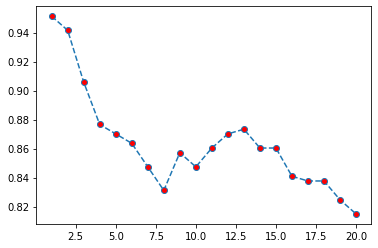

In [69]:
# Plot of K values and Scores
plt.plot(range(1,21), scores, marker='o', markerfacecolor='r', linestyle='--')

In [70]:
final_model = KNeighborsClassifier(n_neighbors=7, metric='euclidean')
final_model.fit(scaled_X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [71]:
# Prediction on  training data
final_train_pred = final_model.predict(scaled_X_train)
final_train_pred

array([1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,

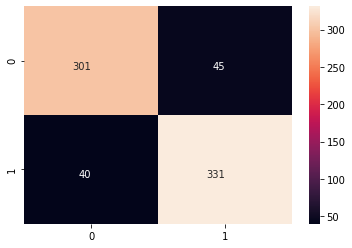

In [72]:
# Confusion Matrix of Training data
#Syntax: confusion_matrix(ActualValues, Predicted Values)
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_train, final_train_pred), annot=True, 
            fmt='d', annot_kws={'va':'top','ha':'right'}) # d--> integer formatting

In [73]:
# Classification report for training Data
# Precision--> PPV--> Out of the positive predicted values, how many truely positive
print(classification_report(y_train, final_train_pred))

              precision    recall  f1-score   support

           0       0.88      0.87      0.88       346
           1       0.88      0.89      0.89       371

    accuracy                           0.88       717
   macro avg       0.88      0.88      0.88       717
weighted avg       0.88      0.88      0.88       717



In [74]:
# Predictions on Test Data
final_test_pred = final_model.predict(scaled_X_test)  # y_test
final_test_pred

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,

#### Next let us Compare actual values of test data(y_test) and final_test_pred(model predicted values)
Confusion_matrix(actualValues, predictedValues)

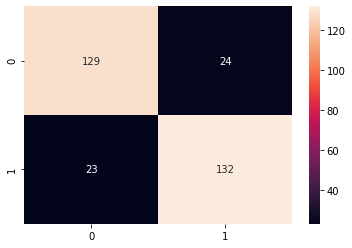

In [75]:
sns.heatmap(confusion_matrix(y_test, final_test_pred), annot=True, fmt='d')

In [76]:
# Classification Report for Test Data
print(classification_report(y_test, final_test_pred))

              precision    recall  f1-score   support

           0       0.85      0.84      0.85       153
           1       0.85      0.85      0.85       155

    accuracy                           0.85       308
   macro avg       0.85      0.85      0.85       308
weighted avg       0.85      0.85      0.85       308



In [77]:
predicted_acc_test=accuracy_score(y_test, final_test_pred)  
predicted_acc_test

0.8474025974025974

In [78]:
predicted_acc_test=accuracy_score(y_train, final_train_pred)  
predicted_acc_test

0.8814504881450488

In [79]:
#With Hyper Parameters Tuning
#2-4,kNearestNeighbors
#importing modules
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
#making the instance
model = KNeighborsClassifier(n_jobs=-1)
#Hyper Parameters Set
params = {'n_neighbors':[5,6,7,8,9,10],
          'leaf_size':[1,2,3,5],
          'weights':['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree','kd_tree','brute'],
          'n_jobs':[-1]}
#Making models with hyper parameters sets
model1 = GridSearchCV(model, param_grid=params, n_jobs=1)
#Learning
model1.fit(scaled_X_train,y_train)
#The best hyper parameters set
print("Best Hyper Parameters:\n",model1.best_params_)
#Prediction
final_test_pred=model1.predict(scaled_X_test)
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(final_test_pred,y_test))
#evaluation(Confusion Metrix)
print("Confusion Metrix:\n",metrics.confusion_matrix(final_test_pred,y_test))

Best Hyper Parameters:
 {'algorithm': 'auto', 'leaf_size': 1, 'n_jobs': -1, 'n_neighbors': 10, 'weights': 'distance'}
Accuracy: 0.974025974025974
Confusion Metrix:
 [[149   4]
 [  4 151]]


## Gausian Naive Bayes Algorithm

In [80]:
#Apply the Naive Bayes Algorithm
#Import BernNB
from sklearn.naive_bayes import BernoulliNB

# creating an object for BerNB
model_BernNB = BernoulliNB()

In [81]:
# Applying the Algorithm to the data
# ObjectName.fit(Input, Output)
 
model_BernNB.fit(X_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [82]:
y_train_pred = model_BernNB.predict(X_train)

In [83]:
# Compare the actual values(y_train) with predicted values(y_train_pred)
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_train, y_train_pred)

array([[265,  81],
       [ 49, 322]], dtype=int64)

In [84]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.84      0.77      0.80       346
           1       0.80      0.87      0.83       371

    accuracy                           0.82       717
   macro avg       0.82      0.82      0.82       717
weighted avg       0.82      0.82      0.82       717



In [85]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,y_train_pred)

0.8186889818688982

In [86]:
 #Applying the Algorithm to the data
# ObjectName.fit(Input, Output)

model_BernNB.fit(X_test, y_test)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [87]:
# Prediction on Test Data
# Syntax: objectname.predict(InputValues)

y_test_pred = model_BernNB.predict(X_test)

In [88]:
# Compare the actual values(y_test) with predicted values(y_test_pred)
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test, y_test_pred)

array([[126,  27],
       [ 26, 129]], dtype=int64)

In [89]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.83      0.82      0.83       153
           1       0.83      0.83      0.83       155

    accuracy                           0.83       308
   macro avg       0.83      0.83      0.83       308
weighted avg       0.83      0.83      0.83       308



In [90]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_test_pred)

0.827922077922078

### got final accuracy for logistic regression as 86.6%
### I got final accuracy for as K Neighbors Classifier 89.7%
### I got final accuracy for logistic regression as Gausian Naive Bayes 82.7%
### Hence the best algorithm that fits this project is K Neighbors Classifier¶